In [ ]:
#Installing causaldata package
install.packages('causaldata')
install.packages('readr')
install.packages('dplyr')
install.packages("tidyr")
library(tidyr)

#Loading library
library(causaldata)
library(readr)
library(dplyr)

#Loading data into the environment
data("scorecard", package = "causaldata")
head(scorecard)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,unitid,inst_name,state_abbr,pred_degree_awarded_ipeds,year,earnings_med,count_not_working,count_working
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,100654,Alabama A & M University,AL,3,2007,36600,116,1139
2,100663,University of Alabama at Birmingham,AL,3,2007,40800,366,2636
3,100690,Amridge University,AL,3,2007,NA,6,25
4,100706,University of Alabama in Huntsville,AL,3,2007,49300,122,975
5,100724,Alabama State University,AL,3,2007,30500,210,1577
6,100751,The University of Alabama,AL,3,2007,46700,292,2754


In [ ]:
# Summary statistics
summary(scorecard)

# Check for missing values
colSums(is.na(scorecard))

# Structure of the dataset
str(scorecard)

     unitid        inst_name          state_abbr       
 Min.   :100654   Length:48445       Length:48445      
 1st Qu.:163532   Class :character   Class :character  
 Median :212115   Mode  :character   Mode  :character  
 Mean   :260438                                        
 3rd Qu.:409120                                        
 Max.   :490009                                        
                                                       
 pred_degree_awarded_ipeds      year       earnings_med    count_not_working
 Min.   :1.000             Min.   :2007   Min.   :  8400   Min.   :    0.0  
 1st Qu.:1.000             1st Qu.:2011   1st Qu.: 24700   1st Qu.:   46.0  
 Median :2.000             Median :2012   Median : 31600   Median :  115.0  
 Mean   :1.913             Mean   :2012   Mean   : 33348   Mean   :  369.4  
 3rd Qu.:3.000             3rd Qu.:2014   3rd Qu.: 39800   3rd Qu.:  300.0  
 Max.   :3.000             Max.   :2016   Max.   :186500   Max.   :15960.0  
             

unitid                 inst_name                state_abbr 
                        0                         0                         0 
pred_degree_awarded_ipeds                      year              earnings_med 
                        0                         0                     15706 
        count_not_working             count_working 
                    15801                     14772

'data.frame':	48445 obs. of  8 variables:
 $ unitid                   : int  100654 100663 100690 100706 100724 100751 100760 100812 100830 100858 ...
  ..- attr(*, "label")= Named chr "College identifiers"
  .. ..- attr(*, "names")= chr "unitid"
 $ inst_name                : chr  "Alabama A & M University" "University of Alabama at Birmingham" "Amridge University" "University of Alabama in Huntsville" ...
  ..- attr(*, "label")= Named chr "Name of the college or university"
  .. ..- attr(*, "names")= chr "inst_name"
 $ state_abbr               : chr  "AL" "AL" "AL" "AL" ...
  ..- attr(*, "label")= Named chr "State abbreviation"
  .. ..- attr(*, "names")= chr "state_abbr"
 $ pred_degree_awarded_ipeds: int  3 3 3 3 3 3 2 3 3 3 ...
  ..- attr(*, "label")= Named chr "Predominant degree awarded. 1 = less-than-two-year, 2 = two-year, 3 = four-year+"
  .. ..- attr(*, "names")= chr "pred_degree_awarded_ipeds"
 $ year                     : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007

In [ ]:
# Remove rows with missing values
scorecard_data_clean <- scorecard %>%
  drop_na(earnings_med, count_not_working, count_working)

# Display the cleaned data structure
str(scorecard_data_clean)

'data.frame':	31190 obs. of  8 variables:
 $ unitid                   : int  100654 100663 100706 100724 100751 100760 100812 100830 100858 100937 ...
  ..- attr(*, "label")= Named chr "College identifiers"
  .. ..- attr(*, "names")= chr "unitid"
 $ inst_name                : chr  "Alabama A & M University" "University of Alabama at Birmingham" "University of Alabama in Huntsville" "Alabama State University" ...
  ..- attr(*, "label")= Named chr "Name of the college or university"
  .. ..- attr(*, "names")= chr "inst_name"
 $ state_abbr               : chr  "AL" "AL" "AL" "AL" ...
  ..- attr(*, "label")= Named chr "State abbreviation"
  .. ..- attr(*, "names")= chr "state_abbr"
 $ pred_degree_awarded_ipeds: int  3 3 3 3 3 2 3 3 3 3 ...
  ..- attr(*, "label")= Named chr "Predominant degree awarded. 1 = less-than-two-year, 2 = two-year, 3 = four-year+"
  .. ..- attr(*, "names")= chr "pred_degree_awarded_ipeds"
 $ year                     : int  2007 2007 2007 2007 2007 2007 2007 2007 200

In [ ]:
# Mean imputation
scorecard_data_imputed <- scorecard_data_clean %>%
  mutate(earnings_med = ifelse(is.na(earnings_med), mean(earnings_med, na.rm = TRUE), earnings_med),
         count_not_working = ifelse(is.na(count_not_working), mean(count_not_working, na.rm = TRUE), count_not_working),
         count_working = ifelse(is.na(count_working), mean(count_working, na.rm = TRUE), count_working))

# Display the structure of the imputed data
str(scorecard_data_imputed)


'data.frame':	31190 obs. of  8 variables:
 $ unitid                   : int  100654 100663 100706 100724 100751 100760 100812 100830 100858 100937 ...
  ..- attr(*, "label")= Named chr "College identifiers"
  .. ..- attr(*, "names")= chr "unitid"
 $ inst_name                : chr  "Alabama A & M University" "University of Alabama at Birmingham" "University of Alabama in Huntsville" "Alabama State University" ...
  ..- attr(*, "label")= Named chr "Name of the college or university"
  .. ..- attr(*, "names")= chr "inst_name"
 $ state_abbr               : chr  "AL" "AL" "AL" "AL" ...
  ..- attr(*, "label")= Named chr "State abbreviation"
  .. ..- attr(*, "names")= chr "state_abbr"
 $ pred_degree_awarded_ipeds: int  3 3 3 3 3 2 3 3 3 3 ...
  ..- attr(*, "label")= Named chr "Predominant degree awarded. 1 = less-than-two-year, 2 = two-year, 3 = four-year+"
  .. ..- attr(*, "names")= chr "pred_degree_awarded_ipeds"
 $ year                     : int  2007 2007 2007 2007 2007 2007 2007 2007 200

In [ ]:
# Feature Engineering: Creating a new variable
scorecard_data_imputed <- scorecard_data_imputed %>%
  mutate(work_ratio = count_working / (count_working + count_not_working))

# Display the structure of the data with the new feature
str(scorecard_data_imputed)

'data.frame':	31190 obs. of  9 variables:
 $ unitid                   : int  100654 100663 100706 100724 100751 100760 100812 100830 100858 100937 ...
  ..- attr(*, "label")= Named chr "College identifiers"
  .. ..- attr(*, "names")= chr "unitid"
 $ inst_name                : chr  "Alabama A & M University" "University of Alabama at Birmingham" "University of Alabama in Huntsville" "Alabama State University" ...
  ..- attr(*, "label")= Named chr "Name of the college or university"
  .. ..- attr(*, "names")= chr "inst_name"
 $ state_abbr               : chr  "AL" "AL" "AL" "AL" ...
  ..- attr(*, "label")= Named chr "State abbreviation"
  .. ..- attr(*, "names")= chr "state_abbr"
 $ pred_degree_awarded_ipeds: int  3 3 3 3 3 2 3 3 3 3 ...
  ..- attr(*, "label")= Named chr "Predominant degree awarded. 1 = less-than-two-year, 2 = two-year, 3 = four-year+"
  .. ..- attr(*, "names")= chr "pred_degree_awarded_ipeds"
 $ year                     : int  2007 2007 2007 2007 2007 2007 2007 2007 200

In [ ]:
# Alternatively, for imputed data
correlation_matrix_imputed <- cor(select_if(scorecard_data_imputed, is.numeric), use = "complete.obs")
correlation_matrix_imputed


,unitid,pred_degree_awarded_ipeds,year,earnings_med,count_not_working,count_working,work_ratio
unitid,1.00000000,-0.2956367,0.09006378,-0.19845494,0.18903350,0.17675332,-0.21732710
pred_degree_awarded_ipeds,-0.29563667,1.0000000,-0.01732570,0.63530078,0.14509158,0.19380283,0.59340552
year,0.09006378,-0.0173257,1.00000000,-0.07719464,0.09725127,0.06865445,-0.13418744
earnings_med,-0.19845494,0.6353008,-0.07719464,1.00000000,0.15084674,0.23150590,0.71641221
count_not_working,0.18903350,0.1450916,0.09725127,0.15084674,1.00000000,0.97355709,0.02553962
count_working,0.17675332,0.1938028,0.06865445,0.23150590,0.97355709,1.00000000,0.12047608
work_ratio,-0.21732710,0.5934055,-0.13418744,0.71641221,0.02553962,0.12047608,1.00000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



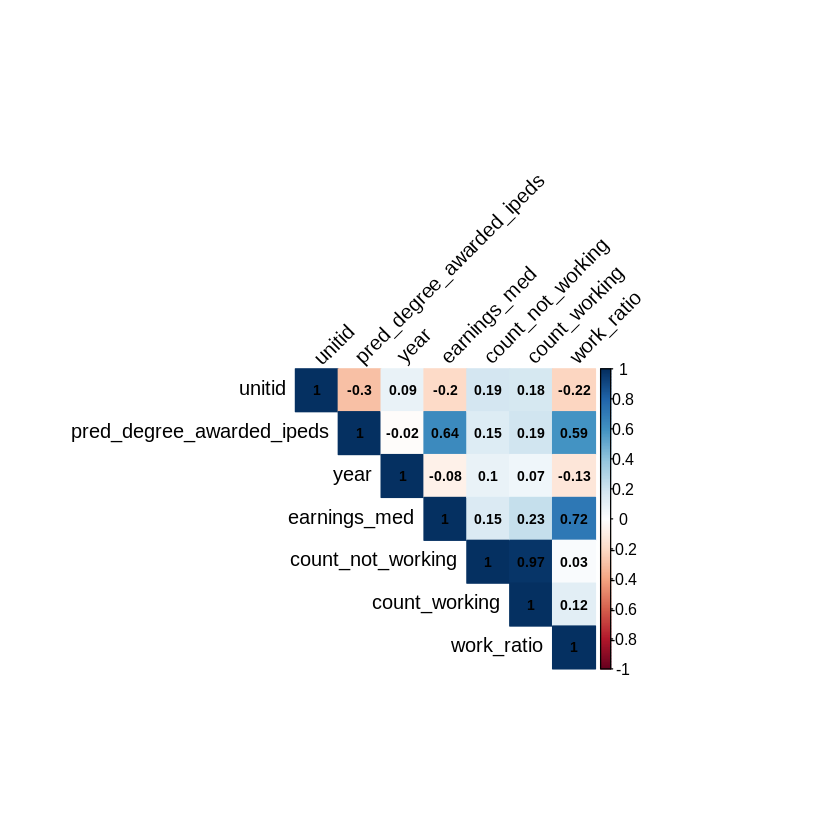

In [ ]:
install.packages("corrplot")

# Load the corrplot library
library(corrplot)

# Visualize the correlation matrix
corrplot(correlation_matrix_imputed, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         addCoef.col = "black", number.cex = 0.7)


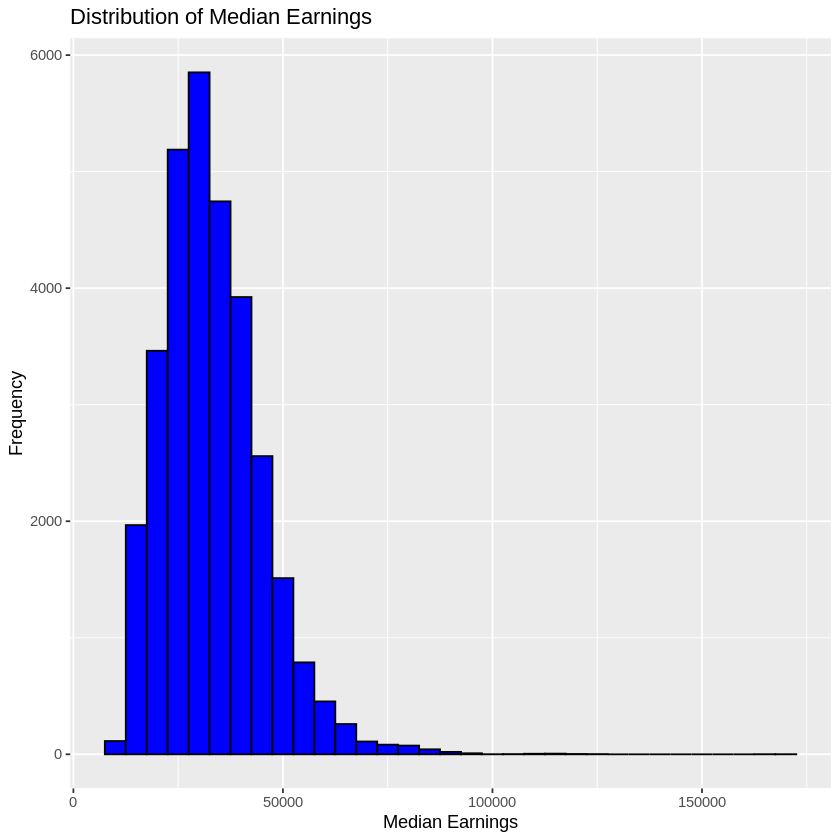

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# Histogram of earnings_med
ggplot(scorecard_data_imputed, aes(x = earnings_med)) +
  geom_histogram(binwidth = 5000, fill = "blue", color = "black") +
  labs(title = "Distribution of Median Earnings", x = "Median Earnings", y = "Frequency")


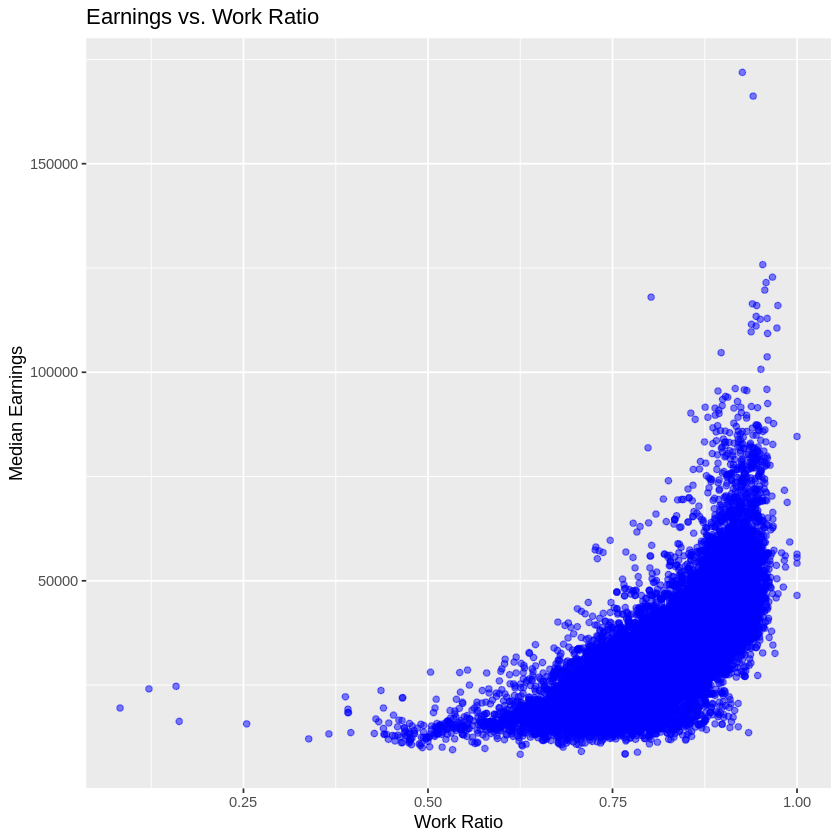

In [ ]:
# Scatter plot of earnings_med vs. work_ratio
ggplot(scorecard_data_imputed, aes(x = work_ratio, y = earnings_med)) +
  geom_point(alpha = 0.5, color = "blue") +
  labs(title = "Earnings vs. Work Ratio", x = "Work Ratio", y = "Median Earnings")


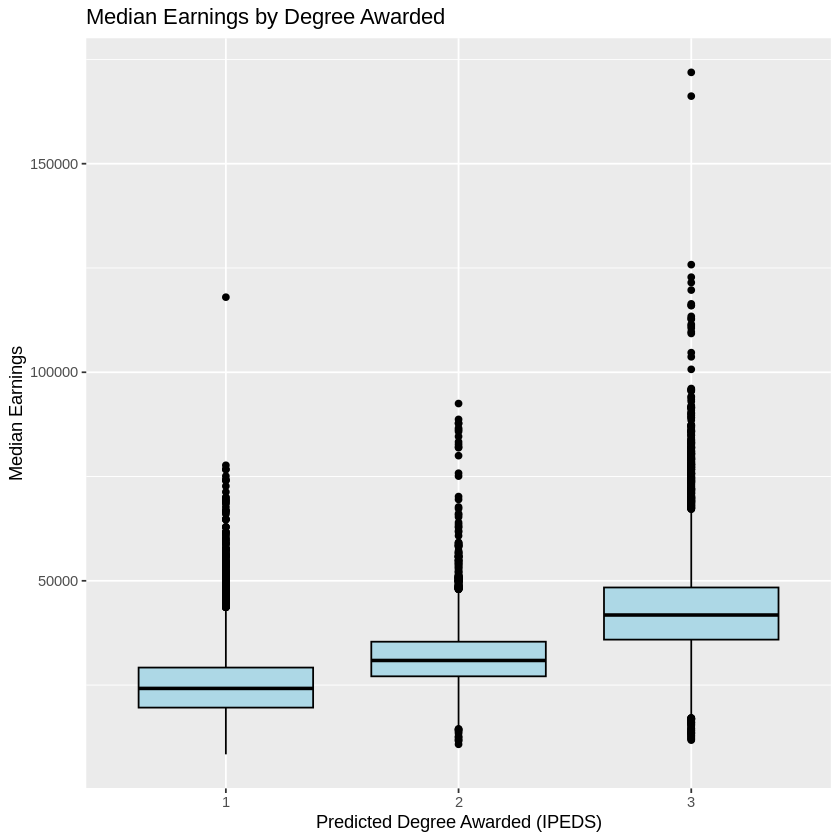

In [ ]:
# Boxplot of earnings_med by pred_degree_awarded_ipeds
ggplot(scorecard_data_imputed, aes(x = as.factor(pred_degree_awarded_ipeds), y = earnings_med)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(title = "Median Earnings by Degree Awarded", x = "Predicted Degree Awarded (IPEDS)", y = "Median Earnings")


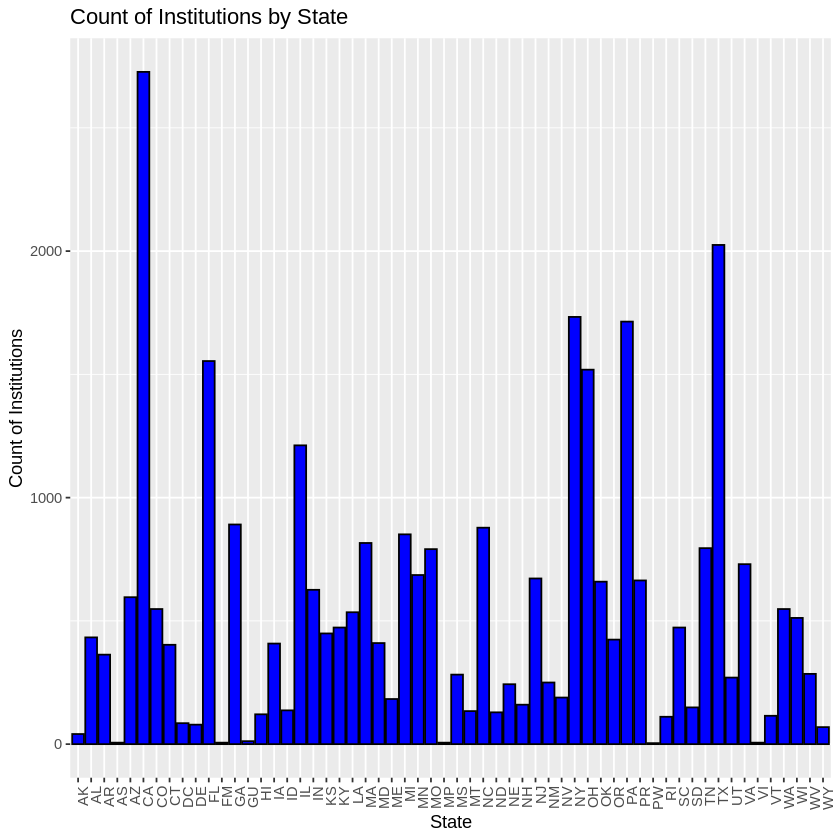

In [ ]:
# Bar graph: Count of institutions by state
ggplot(scorecard_data_imputed, aes(x = state_abbr)) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Count of Institutions by State", x = "State", y = "Count of Institutions") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


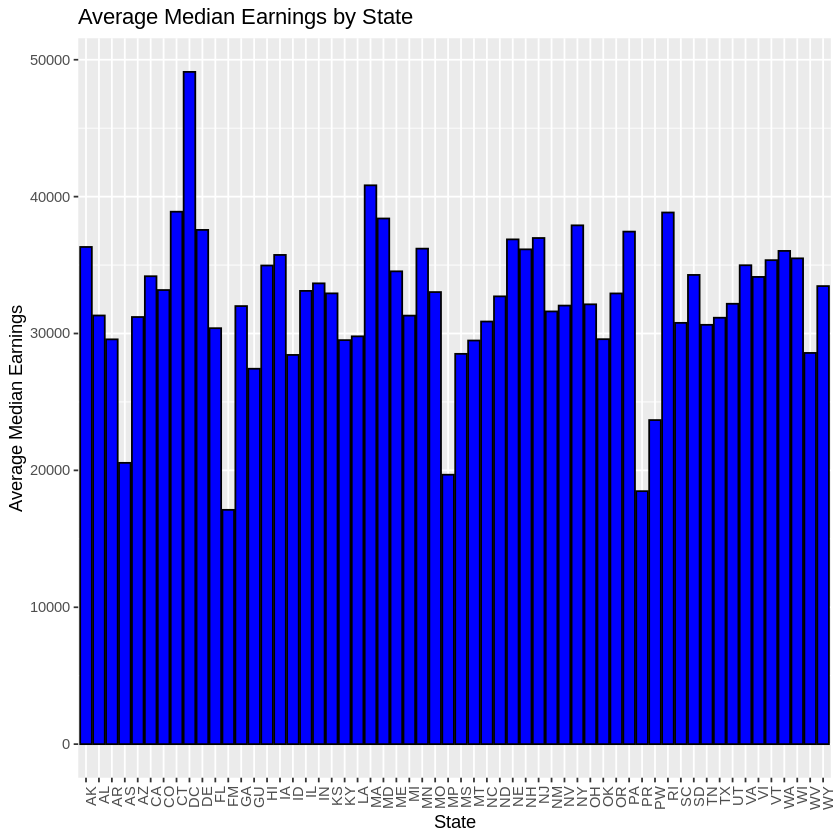

In [ ]:
# Calculate average earnings by state
avg_earnings_state <- scorecard_data_imputed %>%
  group_by(state_abbr) %>%
  summarize(avg_earnings = mean(earnings_med, na.rm = TRUE))

# Bar graph: Average earnings by state
ggplot(avg_earnings_state, aes(x = state_abbr, y = avg_earnings)) +
  geom_bar(stat = "identity", fill = "blue", color = "black") +
  labs(title = "Average Median Earnings by State", x = "State", y = "Average Median Earnings") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


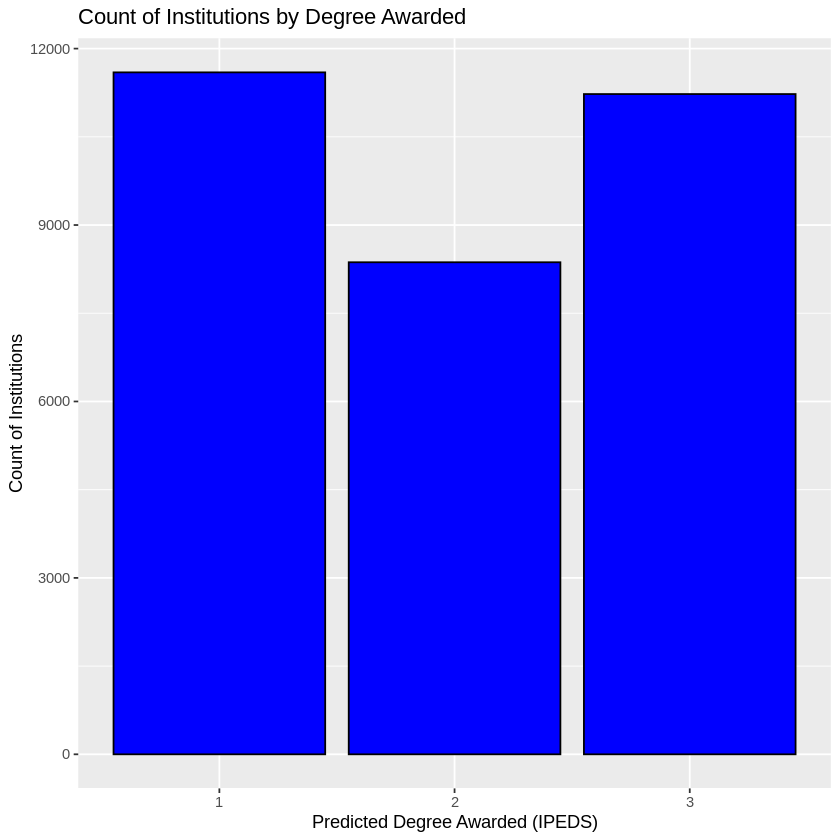

In [ ]:
# Bar graph: Count of institutions by degree awarded
ggplot(scorecard_data_imputed, aes(x = as.factor(pred_degree_awarded_ipeds))) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Count of Institutions by Degree Awarded", x = "Predicted Degree Awarded (IPEDS)", y = "Count of Institutions")


In [ ]:
# Define a mapping from states to regions
state_to_region <- c(
  "CT" = "Northeast", "ME" = "Northeast", "MA" = "Northeast", "NH" = "Northeast",
  "RI" = "Northeast", "VT" = "Northeast", "NJ" = "Northeast", "NY" = "Northeast",
  "PA" = "Northeast", "IL" = "Midwest", "IN" = "Midwest", "MI" = "Midwest",
  "OH" = "Midwest", "WI" = "Midwest", "IA" = "Midwest", "KS" = "Midwest",
  "MN" = "Midwest", "MO" = "Midwest", "NE" = "Midwest", "ND" = "Midwest",
  "SD" = "Midwest", "DE" = "South", "FL" = "South", "GA" = "South", "MD" = "South",
  "NC" = "South", "SC" = "South", "VA" = "South", "DC" = "South", "WV" = "South",
  "AL" = "South", "KY" = "South", "MS" = "South", "TN" = "South", "AR" = "South",
  "LA" = "South", "OK" = "South", "TX" = "South", "AZ" = "West", "CO" = "West",
  "ID" = "West", "MT" = "West", "NV" = "West", "NM" = "West", "UT" = "West",
  "WY" = "West", "AK" = "West", "CA" = "West", "HI" = "West", "OR" = "West",
  "WA" = "West"
)

# Add region information to the dataset
scorecard_data_imputed <- scorecard_data_imputed %>%
  mutate(region = state_to_region[state_abbr])

# Filter out rows with NA regions (if any)
scorecard_data_imputed <- scorecard_data_imputed %>%
  filter(!is.na(region))

# Define a threshold for the minimum count of institutions per state
threshold <- 50

# Calculate the count of institutions per state
state_counts <- scorecard_data_imputed %>%
  group_by(state_abbr) %>%
  summarize(count = n())

# Filter out states with low counts
filtered_states <- state_counts %>%
  filter(count >= threshold) %>%
  pull(state_abbr)

In [ ]:
# Filter the dataset to include only the filtered states
scorecard_data_filtered <- scorecard_data_imputed %>%
  filter(state_abbr %in% filtered_states)

# Display the structure of the filtered dataset
str(scorecard_data_filtered)



'data.frame':	30445 obs. of  10 variables:
 $ unitid                   : int  100654 100663 100706 100724 100751 100760 100812 100830 100858 100937 ...
  ..- attr(*, "label")= Named chr "College identifiers"
  .. ..- attr(*, "names")= chr "unitid"
 $ inst_name                : chr  "Alabama A & M University" "University of Alabama at Birmingham" "University of Alabama in Huntsville" "Alabama State University" ...
  ..- attr(*, "label")= Named chr "Name of the college or university"
  .. ..- attr(*, "names")= chr "inst_name"
 $ state_abbr               : chr  "AL" "AL" "AL" "AL" ...
  ..- attr(*, "label")= Named chr "State abbreviation"
  .. ..- attr(*, "names")= chr "state_abbr"
 $ pred_degree_awarded_ipeds: int  3 3 3 3 3 2 3 3 3 3 ...
  ..- attr(*, "label")= Named chr "Predominant degree awarded. 1 = less-than-two-year, 2 = two-year, 3 = four-year+"
  .. ..- attr(*, "names")= chr "pred_degree_awarded_ipeds"
 $ year                     : int  2007 2007 2007 2007 2007 2007 2007 2007 20

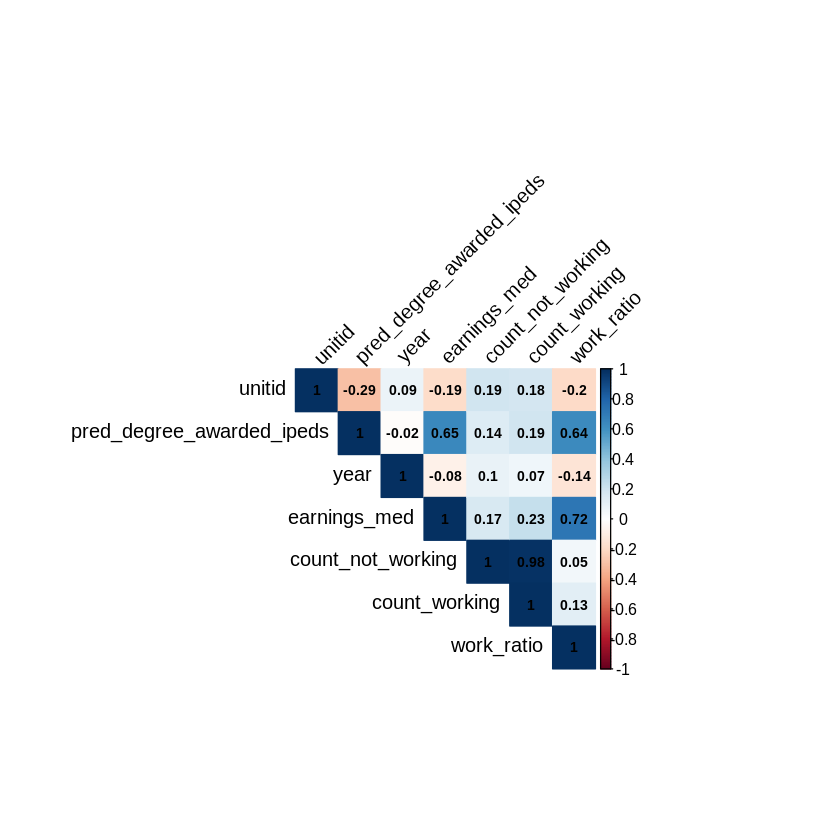

In [ ]:
# Compute the correlation matrix for numeric columns in the filtered dataset
correlation_matrix_filtered <- cor(select_if(scorecard_data_filtered, is.numeric), use = "complete.obs")

# Visualize the correlation matrix
library(corrplot)
corrplot(correlation_matrix_filtered, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         addCoef.col = "black", number.cex = 0.7)


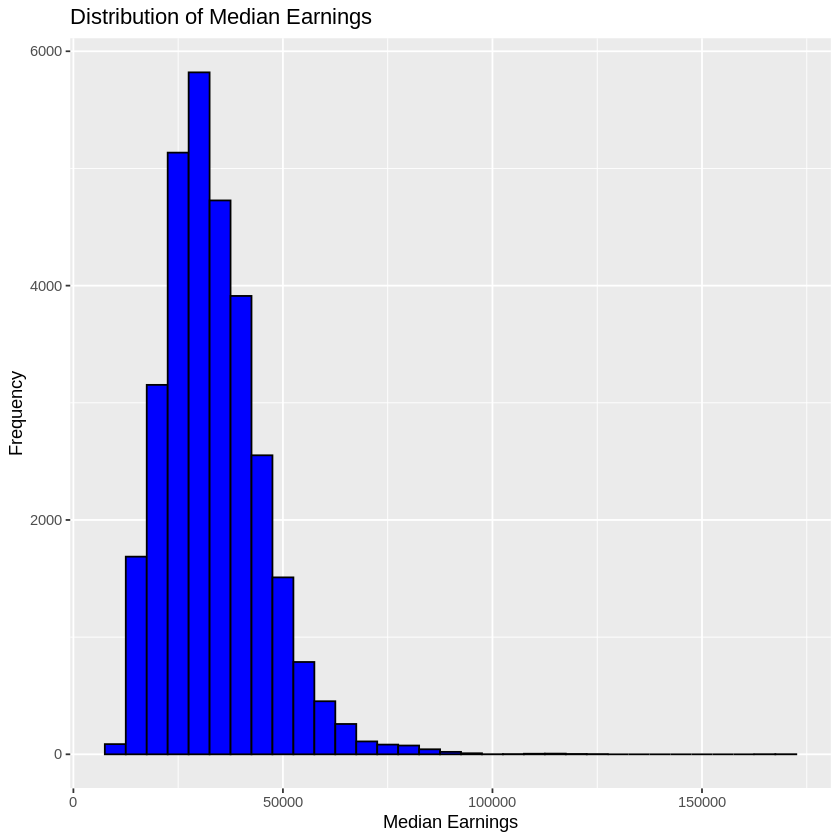

In [ ]:
# Histogram of earnings_med in the filtered dataset
ggplot(scorecard_data_filtered, aes(x = earnings_med)) +
  geom_histogram(binwidth = 5000, fill = "blue", color = "black") +
  labs(title = "Distribution of Median Earnings", x = "Median Earnings", y = "Frequency")


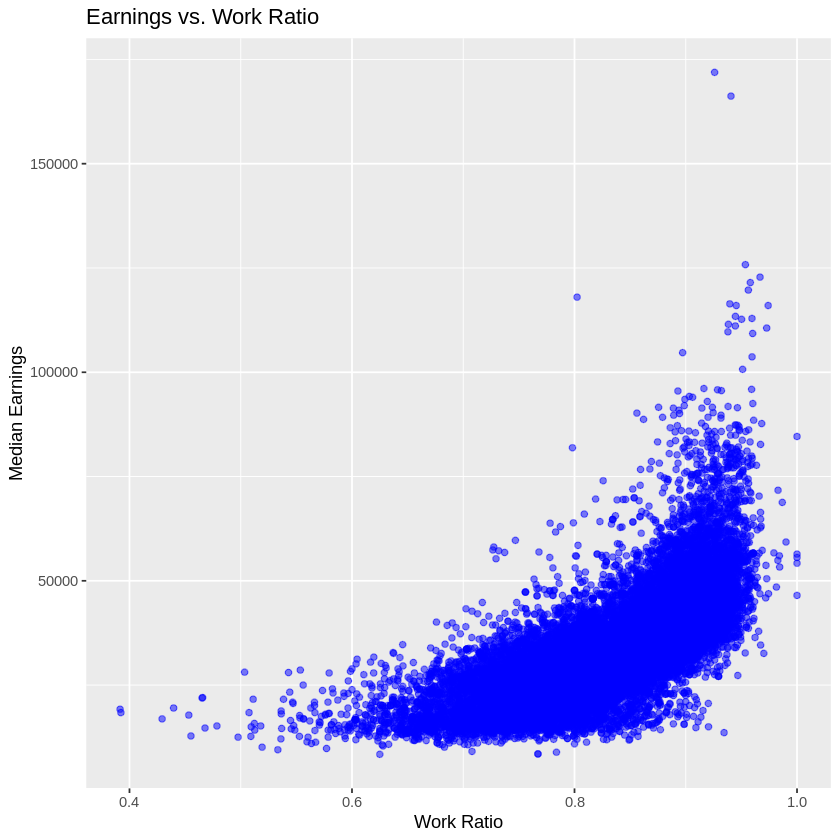

In [ ]:
# Scatter plot of earnings_med vs. work_ratio in the filtered dataset
ggplot(scorecard_data_filtered, aes(x = work_ratio, y = earnings_med)) +
  geom_point(alpha = 0.5, color = "blue") +
  labs(title = "Earnings vs. Work Ratio", x = "Work Ratio", y = "Median Earnings")


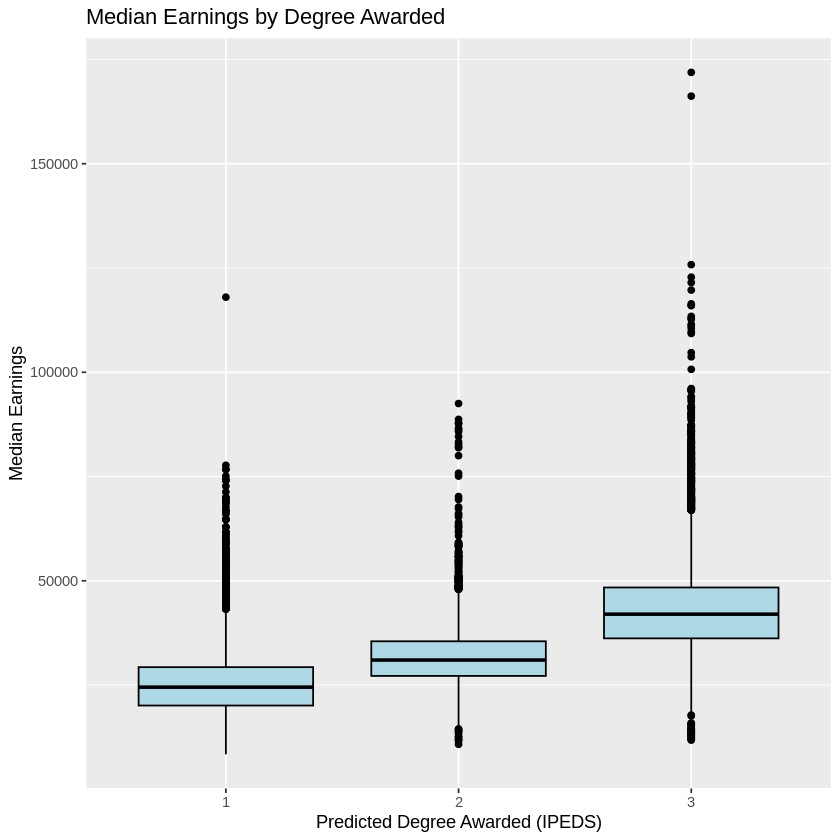

In [ ]:
# Boxplot of earnings_med by pred_degree_awarded_ipeds in the filtered dataset
ggplot(scorecard_data_filtered, aes(x = as.factor(pred_degree_awarded_ipeds), y = earnings_med)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(title = "Median Earnings by Degree Awarded", x = "Predicted Degree Awarded (IPEDS)", y = "Median Earnings")


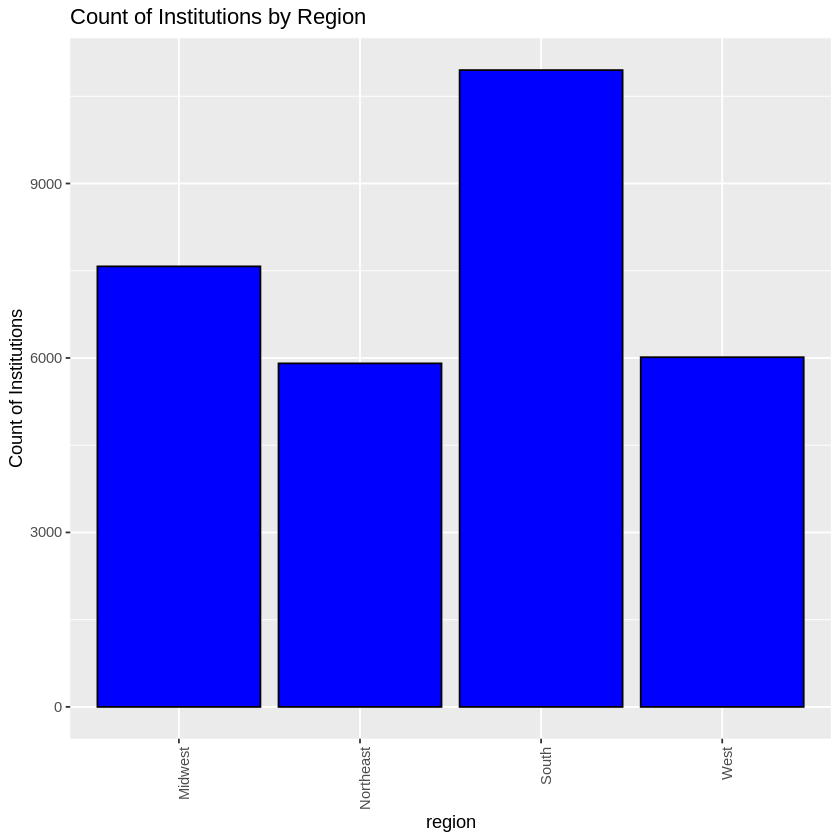

In [ ]:
# Bar graph: Count of institutions by region in the filtered dataset
ggplot(scorecard_data_filtered, aes(x = region)) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Count of Institutions by Region", x = "region", y = "Count of Institutions") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


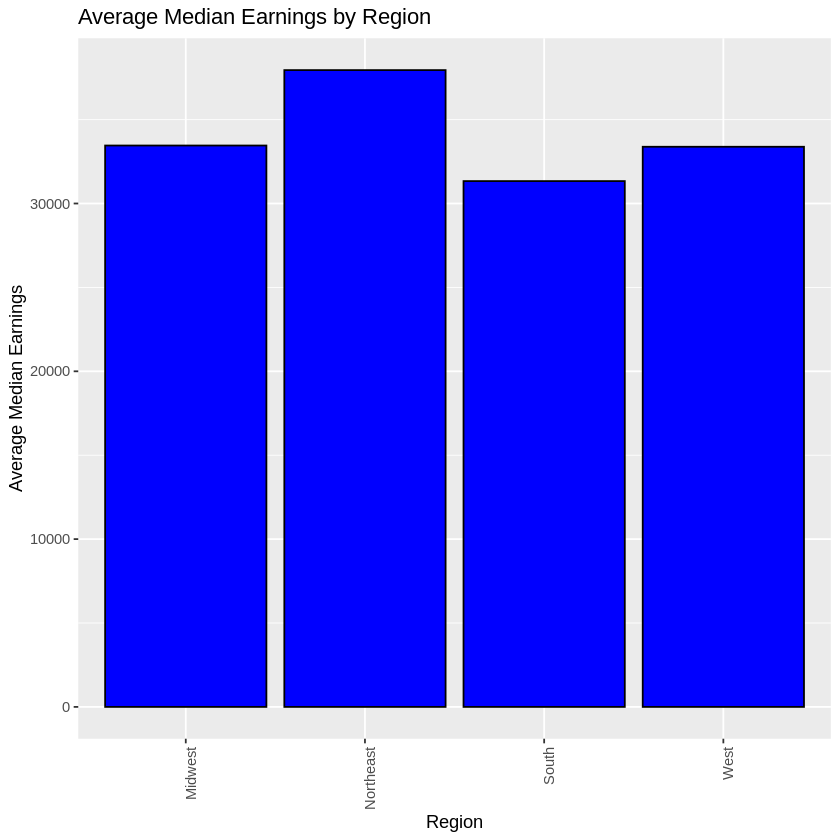

In [ ]:
# Calculate average earnings by region in the filtered dataset
avg_earnings_region_filtered <- scorecard_data_filtered %>%
  group_by(region) %>%
  summarize(avg_earnings = mean(earnings_med, na.rm = TRUE))

# Bar graph: Average earnings by region in the filtered dataset
ggplot(avg_earnings_region_filtered, aes(x = region, y = avg_earnings)) +
  geom_bar(stat = "identity", fill = "blue", color = "black") +
  labs(title = "Average Median Earnings by Region", x = "Region", y = "Average Median Earnings") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


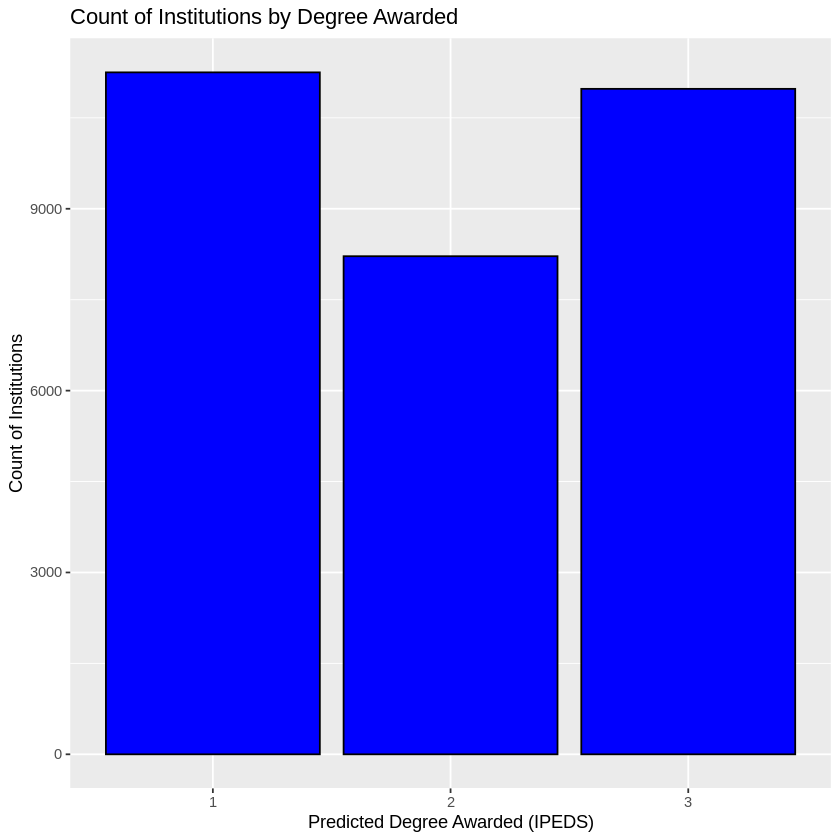

In [ ]:
# Bar graph: Count of institutions by degree awarded in the filtered dataset
ggplot(scorecard_data_filtered, aes(x = as.factor(pred_degree_awarded_ipeds))) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Count of Institutions by Degree Awarded", x = "Predicted Degree Awarded (IPEDS)", y = "Count of Institutions")


In [ ]:
install.packages('car')
library(car)
vif_model <- lm(earnings_med ~ pred_degree_awarded_ipeds + work_ratio + region, data = scorecard_data_filtered)
vif(vif_model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘carData’


The following object is masked from ‘package:causaldata’:

    Mroz



Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




,GVIF,Df,GVIF^(1/(2*Df))
pred_degree_awarded_ipeds,1.716265,1,1.310063
work_ratio,1.836178,1,1.355057
region,1.097816,3,1.015675


In [ ]:
# Normalize work_ratio
scorecard_data_filtered <- scorecard_data_filtered %>%
  mutate(work_ratio = (work_ratio - mean(work_ratio, na.rm = TRUE)) / sd(work_ratio, na.rm = TRUE))


In [ ]:

# One-hot encode the region variable using model.matrix
region_dummies <- model.matrix(~ region - 1, data = scorecard_data_filtered)
scorecard_data_encoded <- cbind(scorecard_data_filtered, region_dummies)


In [ ]:
# Select relevant features
features<- scorecard_data_encoded %>%
  select(earnings_med, year, pred_degree_awarded_ipeds, work_ratio, regionNortheast, regionMidwest, regionSouth, regionWest)
features_did <- scorecard_data_encoded %>%
  select(earnings_med, unitid, year, pred_degree_awarded_ipeds, work_ratio, regionNortheast, regionMidwest, regionSouth, regionWest)


# **Causal Analysis 1: Education Quality (Work_ratio) on Median Earnings**

In [ ]:
train_data <- features
# Create a binary treatment variable based on the median of work_ratio
train_data <- train_data %>%
  mutate(work_ratio_binary = ifelse(work_ratio > median(work_ratio, na.rm = TRUE), 1, 0))

train_data_did <- features_did

# **Propensity Score Matching with ATE calculations**

In [ ]:
# Install necessary libraries if not already installed
install.packages(c("MatchIt", "fastDummies", "twang", "cobalt"))

# Load libraries
library(MatchIt)
library(fastDummies)
library(twang)
library(cobalt)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("MatchIt", "fastDummies", "twang", "cobalt")):
“installation of package ‘MatchIt’ had non-zero exit status”
Warning message in install.packages(c("MatchIt", "fastDummies", "twang", "cobalt")):
“installation of package ‘fastDummies’ had non-zero exit status”
Warning message in install.packages(c("MatchIt", "fastDummies", "twang", "cobalt")):
“installation of package ‘twang’ had non-zero exit status”
Warning message in install.packages(c("MatchIt", "fastDummies", "twang", "cobalt")):
“installation of package ‘cobalt’ had non-zero exit status”


In [ ]:
# Remove the work_ratio column

train_data <- train_data %>% select(-work_ratio)
# Convert the year column to dummy variables
train_data <- dummy_cols(train_data, select_columns = "year")
train_data <- train_data %>% select(-year)

# Define the treatment and outcome variables
treatment <- "work_ratio_binary"
outcome <- "earnings_med"

# Define the covariates (excluding the treatment and outcome)
covariates <- setdiff(names(train_data), c(treatment, outcome))

# Create the formula for the propensity score model
ps_formula <- as.formula(paste(treatment, "~", paste(covariates, collapse = " + ")))

head(train_data)


,earnings_med,pred_degree_awarded_ipeds,regionNortheast,regionMidwest,regionSouth,regionWest,work_ratio_binary,year_2007,year_2009,year_2011,year_2012,year_2013,year_2014
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,36600,3,0,0,1,0,1,1,0,0,0,0,0
2,40800,3,0,0,1,0,1,1,0,0,0,0,0
3,49300,3,0,0,1,0,1,1,0,0,0,0,0
4,30500,3,0,0,1,0,1,1,0,0,0,0,0
5,46700,3,0,0,1,0,1,1,0,0,0,0,0
6,28100,2,0,0,1,0,1,1,0,0,0,0,0


# **PSM using Logistic Regression**





Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


[1] "Balance after Logistic Regression PSM:"
Balance Measures
                              Type Diff.Adj
distance                  Distance        0
pred_degree_awarded_ipeds  Contin.        0
regionNortheast             Binary        0
regionMidwest               Binary        0
regionSouth                 Binary        0
regionWest                  Binary        0
year_2007                   Binary        0
year_2009                   Binary        0
year_2011                   Binary        0
year_2012                   Binary        0
year_2013                   Binary        0
year_2014                   Binary       -0

Sample sizes
                      Control Treated
All                  15224.     15221
Matched (ESS)          826.06   15221
Matched (Unweighted)  3510.     15221
Unmatched            11714.         0



Call:
lm(formula = as.formula(paste(outcome, "~", treatment)), data = matched_data_logistic)

Residuals:
   Min     1Q Median     3Q    Max 
-29178  -6478  -1278   5122 130922 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        28034.3      175.9  159.34   <2e-16 ***
work_ratio_binary  12944.0      195.2   66.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10420 on 18729 degrees of freedom
Multiple R-squared:  0.1902,	Adjusted R-squared:  0.1901 
F-statistic:  4398 on 1 and 18729 DF,  p-value: < 2.2e-16


[1] "ATE (matched, logistic): 12944.0240026759"


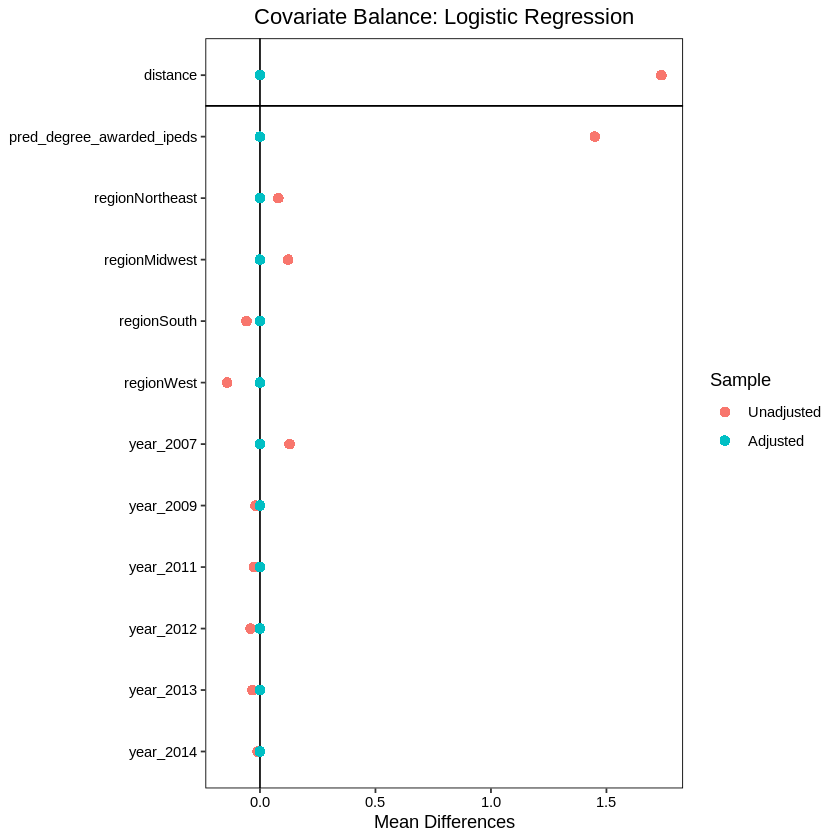

In [ ]:
# Part 1: Logistic Regression


# Perform PSM using logistic regression with replacement and discarding units if necessary
matchit_model_logistic <- matchit(ps_formula, data = train_data, method = "nearest", replace = TRUE, discard = "both")

# Extract matched data for logistic regression model
matched_data_logistic <- match.data(matchit_model_logistic)

# Check the balance of covariates after matching using standardized mean differences
bal_logistic <- bal.tab(matchit_model_logistic)

# Visualize the balance using love plot
love.plot(matchit_model_logistic, title = "Covariate Balance: Logistic Regression")

# Summarize the balance table
print("Balance after Logistic Regression PSM:")
print(bal_logistic)

# Fit linear model to estimate the treatment effect for the matched sample
lm_model_logistic <- lm(as.formula(paste(outcome, "~", treatment)), data = matched_data_logistic)

# Summarize the linear model
summary(lm_model_logistic)

# Calculate and print the ATE for the matched sample
ate_logistic <- summary(lm_model_logistic)$coefficients[treatment, "Estimate"]
print(paste("ATE (matched, logistic):", ate_logistic))

# **PSM using Probit Regression**

Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


[1] "Balance after Probit Regression PSM:"
Balance Measures
                              Type Diff.Adj
distance                  Distance        0
pred_degree_awarded_ipeds  Contin.        0
regionNortheast             Binary        0
regionMidwest               Binary        0
regionSouth                 Binary        0
regionWest                  Binary        0
year_2007                   Binary        0
year_2009                   Binary        0
year_2011                   Binary        0
year_2012                   Binary        0
year_2013                   Binary        0
year_2014                   Binary       -0

Sample sizes
                      Control Treated
All                  15224.     15221
Matched (ESS)          826.06   15221
Matched (Unweighted)  3510.     15221
Unmatched            11714.         0



Call:
lm(formula = as.formula(paste(outcome, "~", treatment)), data = matched_data_probit)

Residuals:
   Min     1Q Median     3Q    Max 
-29178  -6478  -1278   5122 130922 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        28034.3      175.9  159.34   <2e-16 ***
work_ratio_binary  12944.0      195.2   66.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10420 on 18729 degrees of freedom
Multiple R-squared:  0.1902,	Adjusted R-squared:  0.1901 
F-statistic:  4398 on 1 and 18729 DF,  p-value: < 2.2e-16


[1] "ATE (matched, probit): 12944.0240026759"


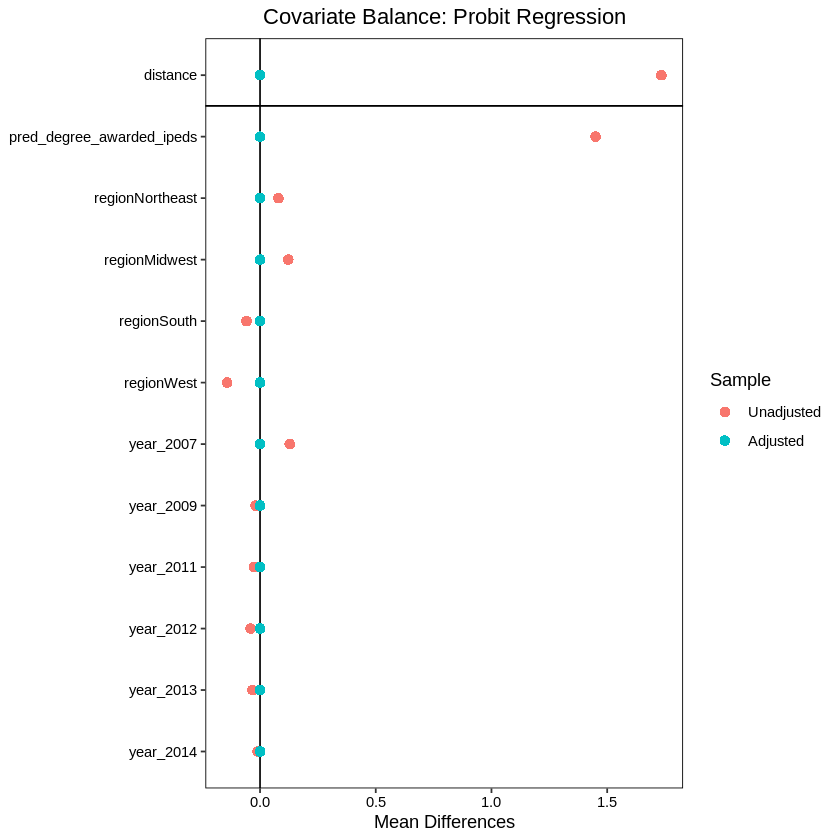

In [ ]:
# Part 2: Probit Regression

# Perform PSM using probit regression with replacement and discarding units if necessary
matchit_model_probit <- matchit(ps_formula, data = train_data, method = "nearest", link = "probit", replace = TRUE, discard = "both")

# Extract matched data for probit regression model
matched_data_probit <- match.data(matchit_model_probit)

# Check the balance of covariates after matching using standardized mean differences
bal_probit <- bal.tab(matchit_model_probit)

# Visualize the balance using love plot
love.plot(matchit_model_probit, title = "Covariate Balance: Probit Regression")

# Summarize the balance table
print("Balance after Probit Regression PSM:")
print(bal_probit)

# Fit linear model to estimate the treatment effect for the matched sample
lm_model_probit <- lm(as.formula(paste(outcome, "~", treatment)), data = matched_data_probit)

# Summarize the linear model
summary(lm_model_probit)

# Calculate and print the ATE for the matched sample
ate_probit <- summary(lm_model_probit)$coefficients[treatment, "Estimate"]
print(paste("ATE (matched, probit):", ate_probit))



# **DiD Analysis for Causal Analysis 1**

In [ ]:
library(readr)

# Create an indicator for before and after 2012
train_data_did <- train_data_did %>%
  mutate(after_2012 = ifelse(year > 2012, 1, 0))



In [ ]:
# Load necessary library
library(dplyr)
library(readr)


# Group by unitid and after_2012, aggregate the median of work_ratio and median earnings
aggregated_data <- train_data_did %>%
  group_by(unitid, after_2012) %>%
  summarize(
    median_work_ratio = median(work_ratio, na.rm = TRUE),
    earnings_med = median(earnings_med, na.rm = TRUE),
    regionNortheast = max(regionNortheast, na.rm = TRUE),
    regionMidwest = max(regionMidwest, na.rm = TRUE),
    regionSouth = max(regionSouth, na.rm = TRUE),
    regionWest = max(regionWest, na.rm = TRUE),
    degree_level= max(pred_degree_awarded_ipeds,na.rm=TRUE)
  ) %>%
  ungroup()


`summarise()` has grouped output by 'unitid'. You can override using the
`.groups` argument.


In [ ]:
# Create work_ratio_binary column
aggregated_data <- aggregated_data %>%
  mutate(work_ratio_binary = ifelse(median_work_ratio >= 0, 1, 0))


# Remove unitids with only one row
filtered_data <- aggregated_data %>%
  group_by(unitid) %>%
  filter(n() == 2) %>%
  ungroup()


# Identify treatment and control unitids based on specified conditions
treatment_unitids <- filtered_data %>%
  group_by(unitid) %>%
  filter(
    after_2012 == 0 & work_ratio_binary == 0 & lead(after_2012) == 1 & lead(work_ratio_binary) == 1
  ) %>%
  select(unitid) %>%
  distinct() %>%
  pull(unitid)

control_unitids <- filtered_data %>%
  group_by(unitid) %>%
  filter(
    after_2012 == 0 & work_ratio_binary == 0 & lead(after_2012) == 1 & lead(work_ratio_binary) == 0
  ) %>%
  select(unitid) %>%
  distinct() %>%
  pull(unitid)

# Combine the treatment and control unitids
all_unitids <- c(treatment_unitids, control_unitids)

final_data <- filtered_data %>%
  filter(unitid %in% all_unitids)


In [ ]:
# Create a treatment group indicator
final_data <- final_data %>%
  group_by(unitid) %>%
  mutate(treatment_group = ifelse(any(work_ratio_binary == 1 & after_2012 == 1), 1, 0)) %>%
  ungroup()

# Conduct the DiD analysis
# Create interaction term for DiD analysis
final_data <- final_data %>%
  mutate(time_treatment = after_2012 * treatment_group)

# Fit the DiD model
did_model <- lm(earnings_med ~ after_2012 + treatment_group + degree_level + time_treatment + regionNortheast + regionMidwest + regionSouth + regionWest, data = final_data)

# Summarize the model
summary(did_model)


Call:
lm(formula = earnings_med ~ after_2012 + treatment_group + degree_level + 
    time_treatment + regionNortheast + regionMidwest + regionSouth + 
    regionWest, data = final_data)

Residuals:
   Min     1Q Median     3Q    Max 
-18125  -3736    -44   3386  42219 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     21699.71     255.41  84.960  < 2e-16 ***
after_2012         -7.61     163.91  -0.046    0.963    
treatment_group  2546.58     360.08   7.072 1.73e-12 ***
degree_level     3944.28     126.00  31.302  < 2e-16 ***
time_treatment    513.39     505.11   1.016    0.309    
regionNortheast -1161.54     250.04  -4.645 3.48e-06 ***
regionMidwest   -3078.23     237.46 -12.963  < 2e-16 ***
regionSouth     -2932.20     194.15 -15.103  < 2e-16 ***
regionWest            NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5531 on 50

# **Parallel Trends**


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


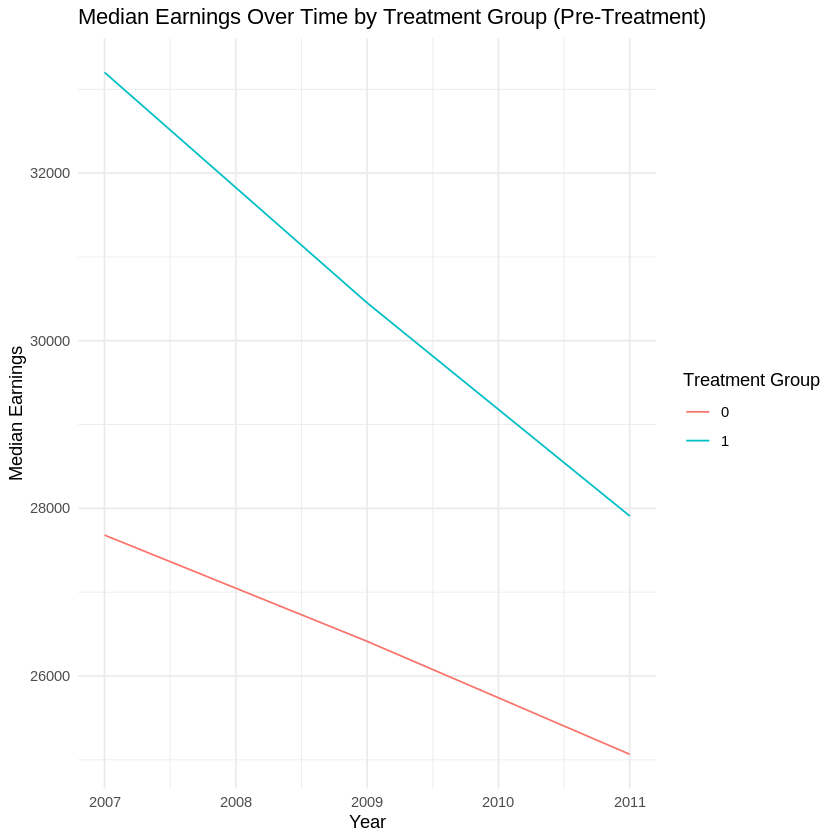

In [ ]:

# Identify treatment and control unitids
treatment_unitids <- final_data %>%
  filter(treatment_group == 1) %>%
  select(unitid) %>%
  distinct() %>%
  pull(unitid)

control_unitids <- final_data %>%
  filter(treatment_group == 0) %>%
  select(unitid) %>%
  distinct() %>%
  pull(unitid)

# Filter the original year-wise data (train_data_did) to include only the identified treatment and control unitids
parallel_data <- train_data_did %>%
  filter(unitid %in% c(treatment_unitids, control_unitids)) %>%
  mutate(treatment_group = ifelse(unitid %in% treatment_unitids, 1, 0)) %>%
  filter(year < 2012) # Keep only the years before 2012 for parallel trends check

# Summarize data to visualize trends
summary_data <- parallel_data %>%
  group_by(year, treatment_group) %>%
  summarize(median_earnings = mean(earnings_med, na.rm = TRUE))

# Plot median earnings over time for treatment and control groups
ggplot(summary_data, aes(x = year, y = median_earnings, color = as.factor(treatment_group))) +
  geom_line() +
  labs(title = "Median Earnings Over Time by Treatment Group (Pre-Treatment)", x = "Year", y = "Median Earnings", color = "Treatment Group") +
  theme_minimal()



 #  **ATT and GATE for Causal Analysis 1**

[1] "ATT (DiD): 505.783582089555"
[1] "GATE estimates by region:"
work_ratio_binary:regionNortheast   work_ratio_binary:regionMidwest 
                         1328.917                         -2496.624 
    work_ratio_binary:regionSouth 
                        -2924.168 


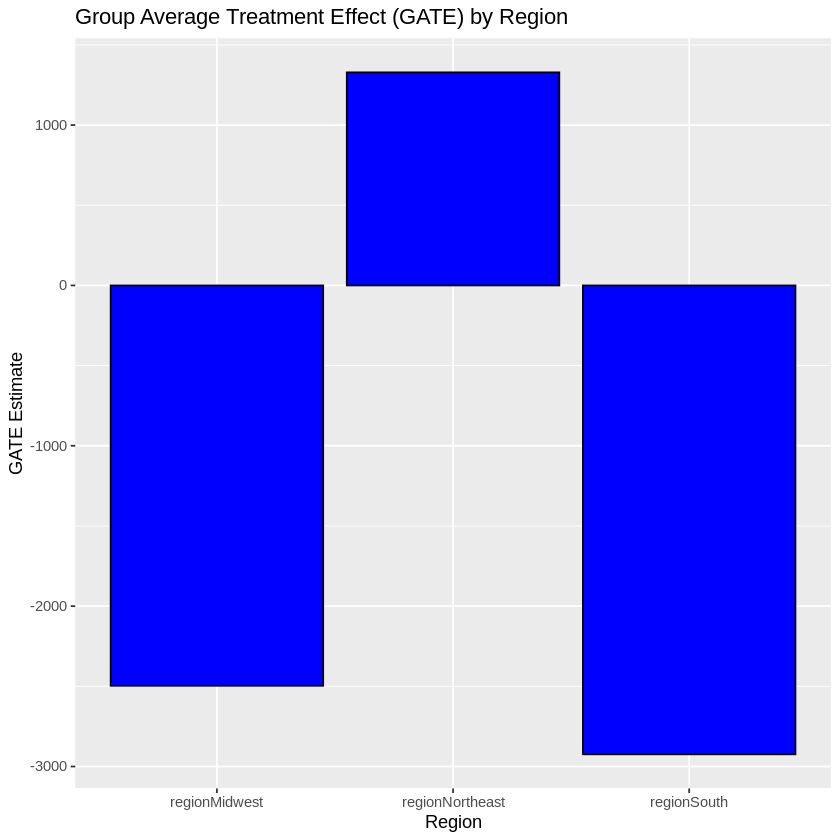

In [ ]:
# Extract the ATT as the sum of the coefficients of after_2012 and the interaction term
after_2012_coeff <- did_results$coefficients["after_2012", "Estimate"]
interaction_coeff <- did_results$coefficients["time_treatment", "Estimate"]
att <- interaction_coeff
print(paste("ATT (DiD):", att))

# Calculate Group Average Treatment Effect (GATE)
gate_model <- lm(earnings_med ~ work_ratio_binary * (regionNortheast + regionMidwest + regionSouth + regionWest) + pred_degree_awarded_ipeds, data = matched_data_probit)
gate_results <- summary(gate_model)
gate_estimates <- gate_results$coefficients[grep("work_ratio_binary:", rownames(gate_results$coefficients)), "Estimate"]
print("GATE estimates by region:")
print(gate_estimates)

# Optional: If you want to visualize the GATE estimates
gate_df <- data.frame(
  region = gsub("work_ratio_binary:", "", names(gate_estimates)),
  estimate = gate_estimates
)
ggplot(gate_df, aes(x = region, y = estimate)) +
  geom_bar(stat = "identity", fill = "blue", color = "black") +
  labs(title = "Group Average Treatment Effect (GATE) by Region", x = "Region", y = "GATE Estimate")


 #  **Causal Analysis 2: Education level (Degree_level) on Median Earnings**

In [ ]:
# Load necessary libraries
library(dplyr)
library(fastDummies)
library(MatchIt)
library(cobalt)
library(readr)


# Convert pred_degree_awarded_ipeds into a binary column
features_2 <- features %>%
  mutate(pred_degree_awarded_ipeds_binary = ifelse(pred_degree_awarded_ipeds %in% c(1, 2), 0, 1))

# Convert the year column to dummy variables
features_2 <- dummy_cols(features_2, select_columns = "year")
features_2 <- features_2 %>% select(-year)
features_2 <- features_2 %>% select(-pred_degree_awarded_ipeds)

# Define the treatment and outcome variables
treatment_2 <- "pred_degree_awarded_ipeds_binary"
outcome_2 <- "earnings_med"

# Define the covariates (excluding the treatment and outcome)
covariates_2 <- setdiff(names(features_2), c(treatment_2, outcome_2))

# Create the formula for the propensity score model
ps_formula_2 <- as.formula(paste(treatment_2, "~", paste(covariates_2, collapse = " + ")))

head(features_2)




,earnings_med,work_ratio,regionNortheast,regionMidwest,regionSouth,regionWest,pred_degree_awarded_ipeds_binary,year_2007,year_2009,year_2011,year_2012,year_2013,year_2014
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,36600,1.1451148,0,0,1,0,1,1,0,0,0,0,0
2,40800,0.7123728,0,0,1,0,1,1,0,0,0,0,0
3,49300,0.8694878,0,0,1,0,1,1,0,0,0,0,0
4,30500,0.7769916,0,0,1,0,1,1,0,0,0,0,0
5,46700,1.0947335,0,0,1,0,1,1,0,0,0,0,0
6,28100,0.1426762,0,0,1,0,0,1,0,0,0,0,0


# **Propensity Score Matching with ATE calculations**

Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


[1] "Balance after Logistic Regression PSM:"
Balance Measures
                    Type Diff.Adj
distance        Distance  -0.0000
work_ratio       Contin.  -0.0484
regionNortheast   Binary  -0.0346
regionMidwest     Binary  -0.0591
regionSouth       Binary   0.0949
regionWest        Binary  -0.0012
year_2007         Binary  -0.0290
year_2009         Binary  -0.0269
year_2011         Binary  -0.0312
year_2012         Binary   0.0232
year_2013         Binary   0.0226
year_2014         Binary   0.0413

Sample sizes
                      Control Treated
All                  19467.     10978
Matched (ESS)          920.82   10978
Matched (Unweighted)  3128.     10978
Unmatched            16334.         0
Discarded                5.         0



Call:
lm(formula = as.formula(paste(outcome_2, "~", treatment_2)), 
    data = matched_data_logistic_2)

Residuals:
   Min     1Q Median     3Q    Max 
-31515  -6715  -1215   4985 128585 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       33845.5      192.7  175.68   <2e-16 ***
pred_degree_awarded_ipeds_binary   9470.0      218.4   43.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10770 on 14104 degrees of freedom
Multiple R-squared:  0.1176,	Adjusted R-squared:  0.1176 
F-statistic:  1880 on 1 and 14104 DF,  p-value: < 2.2e-16


[1] "ATE (matched, logistic): 9469.96586173976"


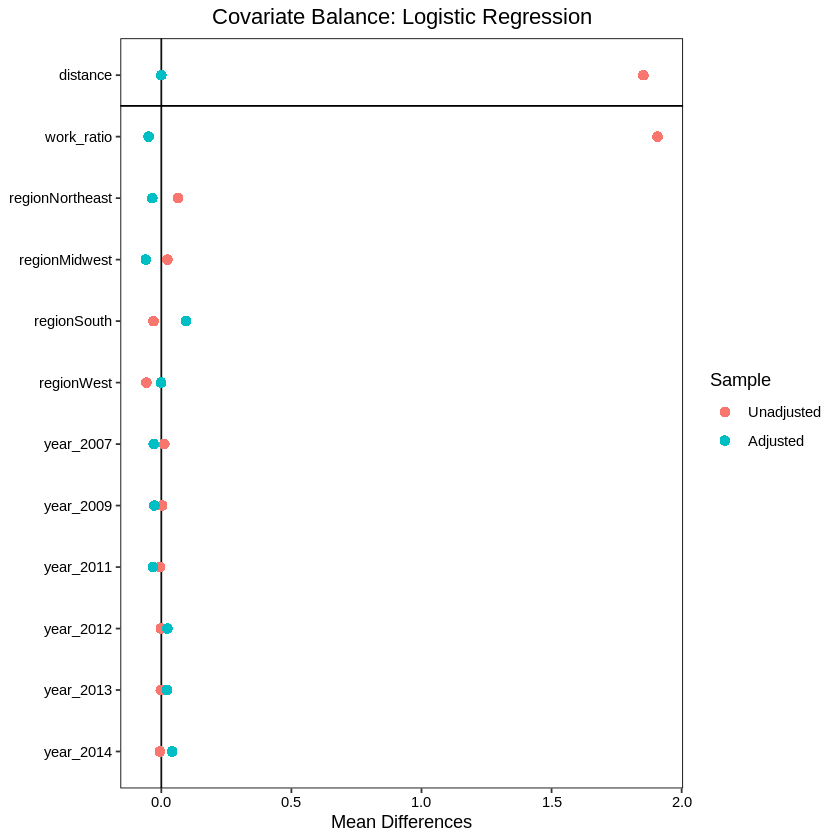

In [ ]:
# Perform PSM using logistic regression with replacement and discarding units if necessary
matchit_model_logistic_2 <- matchit(ps_formula_2, data = features_2, method = "nearest", replace = TRUE, discard = "both")

# Extract matched data for logistic regression model
matched_data_logistic_2 <- match.data(matchit_model_logistic_2)

# Check the balance of covariates after matching using standardized mean differences
bal_logistic <- bal.tab(matchit_model_logistic_2)

# Visualize the balance using love plot
love.plot(matchit_model_logistic_2, title = "Covariate Balance: Logistic Regression")

# Summarize the balance table
print("Balance after Logistic Regression PSM:")
print(bal_logistic)

# Fit linear model to estimate the treatment effect for the matched sample
lm_model_logistic_2 <- lm(as.formula(paste(outcome_2, "~", treatment_2)), data = matched_data_logistic_2)

# Summarize the linear model
summary(lm_model_logistic_2)


# **ATE Estimators**

In [ ]:
# Install necessary packages
install.packages("WeightIt")
install.packages("SuperLearner")
install.packages("glmnet")
install.packages("survey")
install.packages("np")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’, ‘nnls’, ‘cvAUC’




# **Regression based Estimator**

In [ ]:
# Regression-based ATE estimator
ate_logistic_2 <- summary(lm_model_logistic_2)$coefficients[treatment_2, "Estimate"]
print(paste("ATE (Regression-based):", ate_logistic_2))



[1] "ATE (Regression-based): 9469.96586173976"


# **AIPW Estimator**

In [ ]:


# Fit the propensity score model using SuperLearner
ps_model <- SuperLearner(Y = features_2[[treatment_2]],
                         X = features_2[covariates_2],
                         SL.library = c("SL.glm", "SL.step", "SL.glmnet"),
                         family = binomial())

# Predict propensity scores
ps_scores <- predict(ps_model, newdata = features_2[covariates_2])$pred
features_2$ps_scores <- ps_scores

# Check the distribution of propensity scores
summary(features_2$ps_scores)

# Trim extreme propensity scores
trim_threshold <- 0.01 # 1% threshold
features_2 <- features_2 %>%
  filter(ps_scores > trim_threshold & ps_scores < (1 - trim_threshold))

# Recalculate the weights after trimming
features_2$weights <- ifelse(features_2[[treatment_2]] == 1, 1 / features_2$ps_scores, 1 / (1 - features_2$ps_scores))

# Stabilize the weights
mean_treated <- mean(features_2[[treatment_2]])
features_2$stabilized_weights <- features_2$weights * (mean_treated / features_2$ps_scores)

# Summarize the stabilized weights
summary(features_2$stabilized_weights)

# Fit the outcome regression model using SuperLearner
outcome_model <- SuperLearner(Y = features_2[[outcome_2]],
                              X = features_2[c(treatment_2, covariates_2)],
                              SL.library = c("SL.glm", "SL.step", "SL.glmnet"))

# Predict the outcomes
pred_outcome <- predict(outcome_model, newdata = features_2[c(treatment_2, covariates_2)])$pred
features_2$pred_outcome <- pred_outcome

# Calculate the augmented inverse probability weighted (AIPW) estimate
features_2$augmentation <- features_2$stabilized_weights * (features_2[[outcome_2]] - features_2$pred_outcome)

# Summarize the augmentation values
summary(features_2$augmentation)

# Calculate the ATE
ate_aipw <- mean(features_2$augmentation)
print(paste("ATE (AIPW):", ate_aipw))


       V1         
 Min.   :0.00000  
 1st Qu.:0.03277  
 Median :0.20895  
 Mean   :0.35511  
 3rd Qu.:0.69758  
 Max.   :0.99741  

Warning message:
“Using one column matrices in `filter()` was deprecated in dplyr 1.1.0.
ℹ Please use one dimensional logical vectors instead.”


       V1          
 Min.   :  0.4245  
 1st Qu.:  0.8189  
 Median :  2.2617  
 Mean   :  8.9603  
 3rd Qu.:  7.2072  
 Max.   :957.0373  

       V1           
 Min.   :-18407592  
 1st Qu.:    -7902  
 Median :     -740  
 Mean   :     5405  
 3rd Qu.:     9188  
 Max.   : 17292474  

[1] "ATE (AIPW): 5405.08475055529"


# **IPW Estimator**

In [ ]:
# Load necessary libraries
library(survey)
library(SuperLearner)
library(dplyr)
library(fastDummies)


# Define the IPW estimator
# Create the survey design object
design <- svydesign(ids = ~1, weights = ~stabilized_weights, data = features_2)

# Fit the IPW model using survey package
ipw_model <- svyglm(as.formula(paste(outcome_2, "~", treatment_2)), design = design)

# Extract the ATE from the IPW model
ipw_ate <- summary(ipw_model)$coefficients[treatment_2, "Estimate"]
print(paste("ATE (IPW):", ipw_ate))



[1] "ATE (IPW): 6193.68311938487"


# **PLM Estimator**

In [ ]:
# Load necessary library for PLM
library(np)

# Prepare the formula for nonparametric regression
formula_np <- as.formula(paste(outcome_2, "~", paste(c(treatment_2, covariates_2), collapse = "+")))

# Ensure all covariates are numeric
covariates_plm <- features_2 %>% select(all_of(covariates_2)) %>% mutate_all(as.numeric)

# Define the treatment and outcome as numeric
treatment_plm <- as.numeric(features_2[[treatment_2]])
outcome_plm <- as.numeric(features_2[[outcome_2]])

# Fit the nonparametric regression model
bw <- npregbw(xdat = covariates_plm, ydat = outcome_plm, bandwidth.compute = TRUE)
plm_model <- npreg(bw = bw)

# Predict the outcomes using the fitted model
plm_pred <- predict(plm_model, newdata = covariates_plm)

# Calculate the ATE using PLM
plm_ate <- mean(plm_pred$mean)
print(paste("ATE (PLM):", plm_ate))



Multistart 1 of 5 |

Timing stopped at: 408.4 0.083 411.4



# **GATE for Causal Analysis 2**

[1] "GATE estimates by region:"
pred_degree_awarded_ipeds_binary:regionNortheast 
                                        655.9995 
  pred_degree_awarded_ipeds_binary:regionMidwest 
                                       -382.1414 
    pred_degree_awarded_ipeds_binary:regionSouth 
                                       -653.1941 


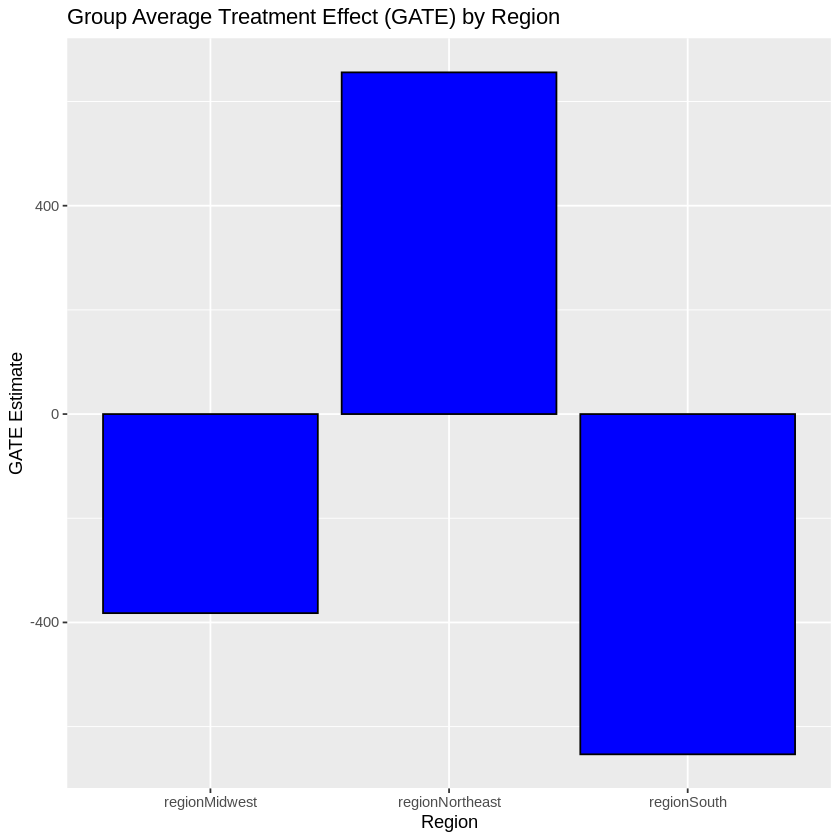

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Define the formula for the linear model
gate_formula <- as.formula("earnings_med ~ pred_degree_awarded_ipeds_binary * (regionNortheast + regionMidwest + regionSouth + regionWest) + work_ratio")

# Fit the linear model
gate_model <- lm(gate_formula, data = features_2)
gate_results <- summary(gate_model)

# Extract GATE estimates for each region
gate_estimates <- gate_results$coefficients[grep("pred_degree_awarded_ipeds_binary:", rownames(gate_results$coefficients)), "Estimate"]
print("GATE estimates by region:")
print(gate_estimates)

# Optional: Visualize the GATE estimates
gate_df <- data.frame(
  region = gsub("pred_degree_awarded_ipeds_binary:", "", names(gate_estimates)),
  estimate = gate_estimates
)

ggplot(gate_df, aes(x = region, y = estimate)) +
  geom_bar(stat = "identity", fill = "blue", color = "black") +
  labs(title = "Group Average Treatment Effect (GATE) by Region", x = "Region", y = "GATE Estimate")
